## Problem 1 : Data Preparation

Lets Download the dataset train.csv andd the associated text file data_description.txt posted withh this Exercise. The dataset
andd description are collected frmom Kaggle. You may also want to download the files directly fromm the Kaggle Competition
(Login > Go to “Data” > “Download All”). Either way, read the competition description to get an idea about the task.
Source : Kaggle Competition : House Prices : https://www.kaggle.com/c/house-prices-advanced-regression-techniques
                
a) Import the “train.csv” data you downloaded (either from NTU Learn or Kaggle) in Jupyter Notebook.
b) What are the data types (“dtypes”) – int64/float64/object – of the variables (columns) in the dataset?
c) Create a new Pandas DataFrame consisting of only the variables (columns) of type Integer (int64).
d) Open the “data_description.txt” file you downloaded (either from NTU Learn or Kaggle) in Wordpad.
Read the description for each variable carefully and try to identify the “actual” Numeric variables.
Categorical variables are often “encoded” as Numeric variables for easy representation. Spot them.
e) Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt #we only need pyplot
sb.set() #set the deafult seaborn style for graphics

1a) Import the “train.csv” data you downloaded (either from NTU Learn or Kaggle) in Jupyter Notebook. 

In [4]:
tr = pd.read_csv('train.csv')
tr.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1b) What are the data types (“dtypes”) – int64/float64/object – of the variables (columns) in the dataset? 

In [6]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [107]:
tr.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

1c) Create a new Pandas DataFrame consisting of only the variables (columns) of type Integer (int64).

In [13]:
#Extract only the int64 data
num = pd.DataFrame(tr[["Id",'MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                      'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']])
num.head(n=20)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,118000


1d) Open the “data_description.txt” file you downloaded (either from NTU Learn or Kaggle) in Wordpad. Read the description for each variable carefully and try to identify the “actual” Numeric variables. Categorical variables are often “encoded” as Numeric variables for easy representation. Spot them.

Id, MSSubClass(Class), OverallQual(Grade, OverallCond(Grade), YearBuilt(year),5 YearRemodAdd(year), MoSold(month), Yrsold(Year)

1e) Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables.

In [17]:
cl = pd.DataFrame(tr[['LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                      'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']])
cl.head(n=20)


,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,8450,706,0,150,856,856,854,0,1710,1,...,2,548,0,61,0,0,0,0,0,208500
1,9600,978,0,284,1262,1262,0,0,1262,0,...,2,460,298,0,0,0,0,0,0,181500
2,11250,486,0,434,920,920,866,0,1786,1,...,2,608,0,42,0,0,0,0,0,223500
3,9550,216,0,540,756,961,756,0,1717,1,...,3,642,0,35,272,0,0,0,0,140000
4,14260,655,0,490,1145,1145,1053,0,2198,1,...,3,836,192,84,0,0,0,0,0,250000
5,14115,732,0,64,796,796,566,0,1362,1,...,2,480,40,30,0,320,0,0,700,143000
6,10084,1369,0,317,1686,1694,0,0,1694,1,...,2,636,255,57,0,0,0,0,0,307000
7,10382,859,32,216,1107,1107,983,0,2090,1,...,2,484,235,204,228,0,0,0,350,200000
8,6120,0,0,952,952,1022,752,0,1774,0,...,2,468,90,0,205,0,0,0,0,129900
9,7420,851,0,140,991,1077,0,0,1077,1,...,1,205,0,4,0,0,0,0,0,118000


## Problem 2 : Statistical Summary
Now that you have a “clean” DataFrame with only Numeric variables, we can safely perform standard statistics.
a) Find the Summary Statistics (Mean, Median, Quartiles etc.) of SalePrice from the Numeric DataFrame.
b) Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE.
c) Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame.
d) Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.
e) Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot and find the Correlation between the two.

2a) Find the Summary Statistics (Mean, Median, Quartiles etc.) of SalePrice from the Numeric DataFrame. 

In [87]:
cl['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [108]:
SalePrice = pd.DataFrame(cl['SalePrice'])
print("Mean:", SalePrice.mean())
print("Median:", SalePrice.median())
print("Quantile:", SalePrice.quantile([0.25,0.50,0.75]))
SalePrice.describe()

Mean: SalePrice    180921.19589
dtype: float64
Median: SalePrice    163000.0
dtype: float64
Quantile:       SalePrice
0.25   129975.0
0.50   163000.0
0.75   214000.0


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


2b) Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE. 

<AxesSubplot:>

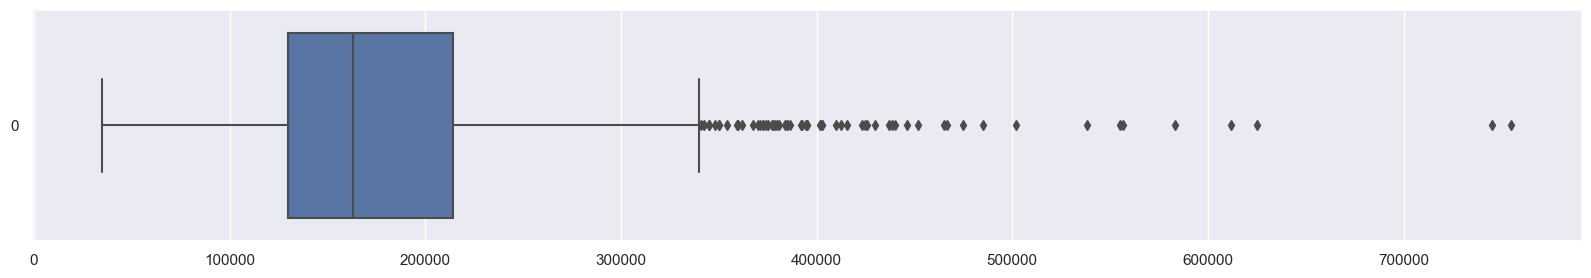

In [60]:
f = plt.figure(figsize=(20,3))
sb.boxplot(data = cl['SalePrice'], orient = 'h')

<AxesSubplot:>

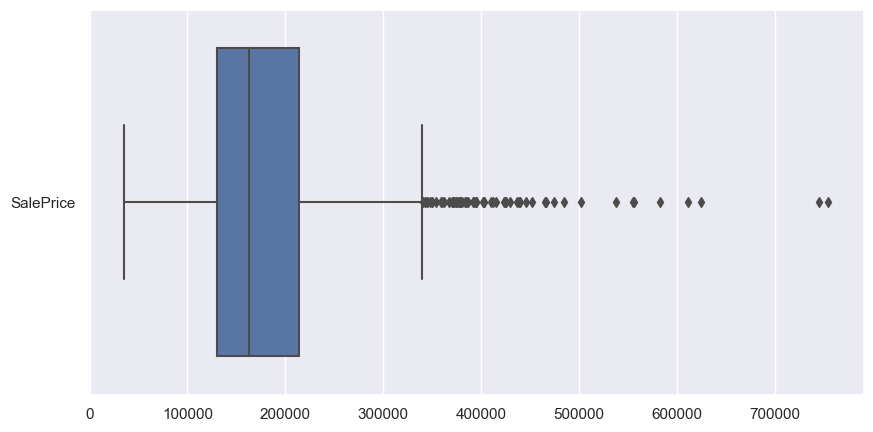

In [61]:
#trying extract saleprice first
sp = pd.DataFrame(cl['SalePrice'])
f = plt.figure(figsize=(10,5))
sb.boxplot(data = sp, orient = 'h')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

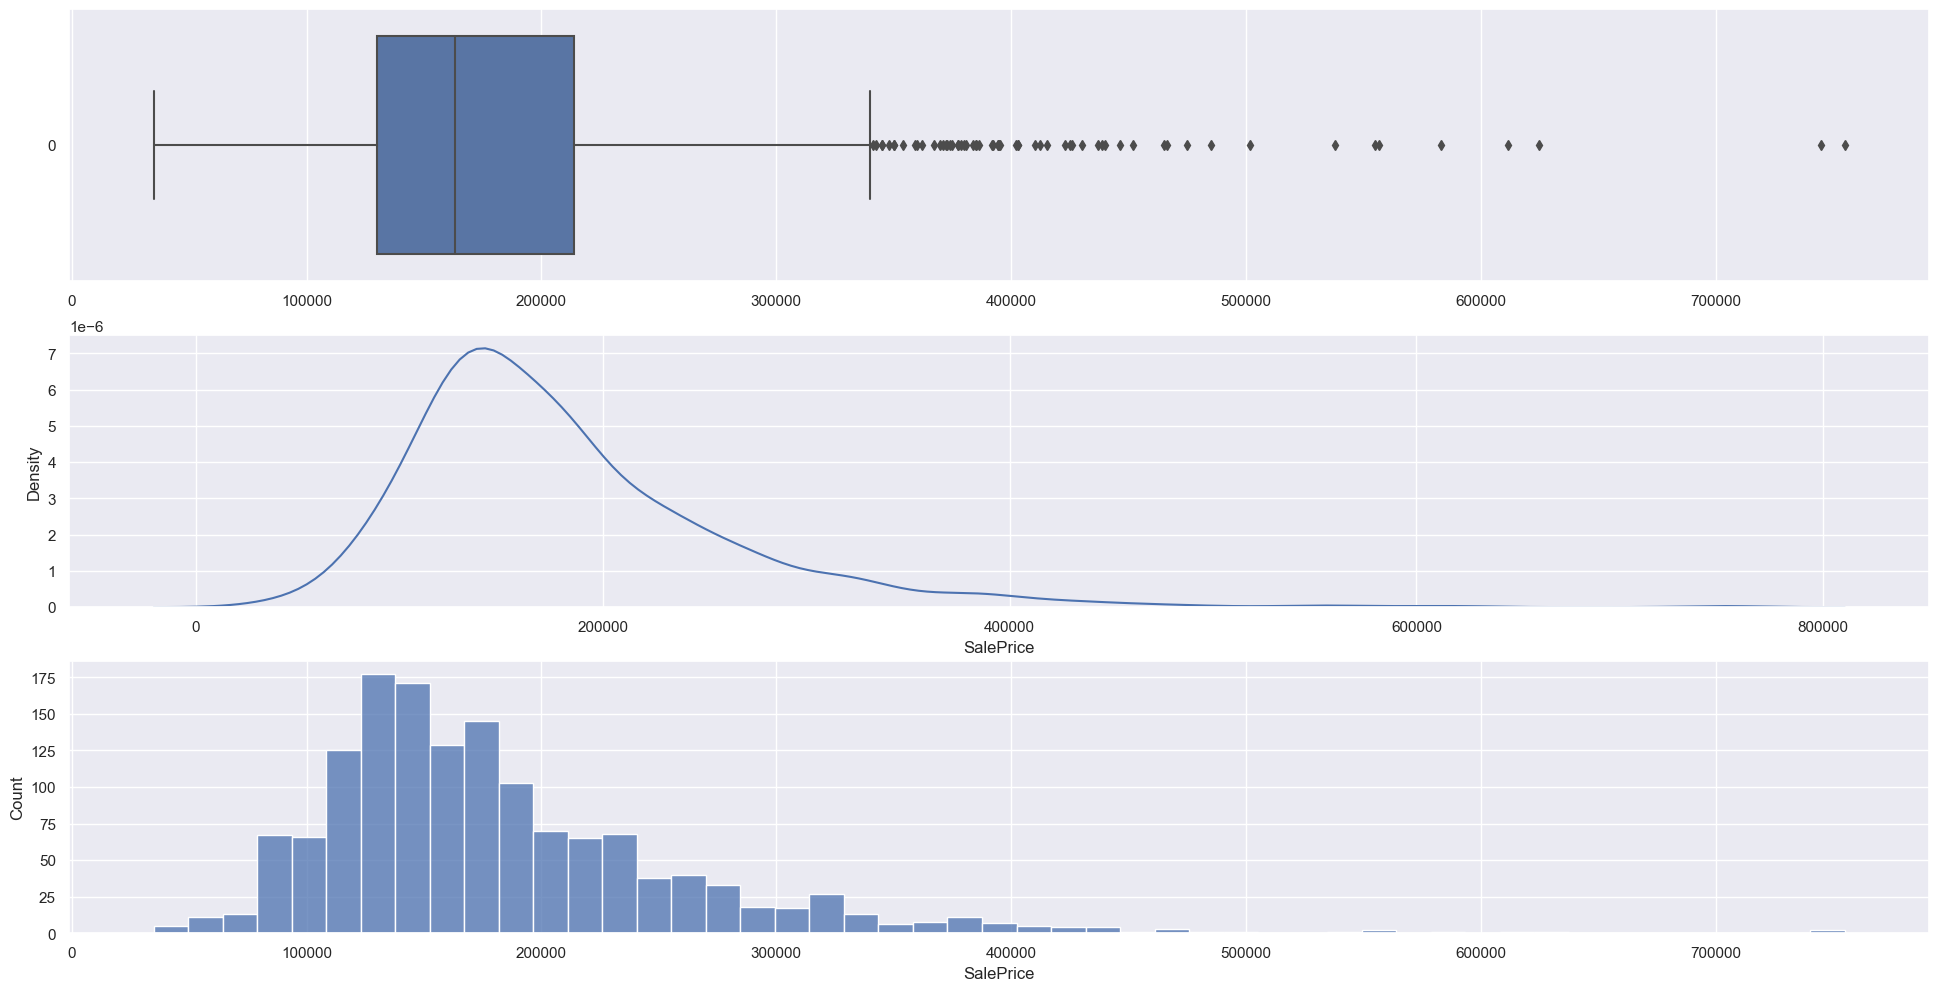

In [84]:
fig, axes = plt.subplots(3, figsize=(24,12))
sb.boxplot(data = cl['SalePrice'],orient='h',ax = axes[0])
sb.kdeplot(data = cl['SalePrice'],ax = axes[1])
sb.histplot(data = cl['SalePrice'],ax = axes[2])


2c) Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame. 

In [86]:
cl['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

2d) Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

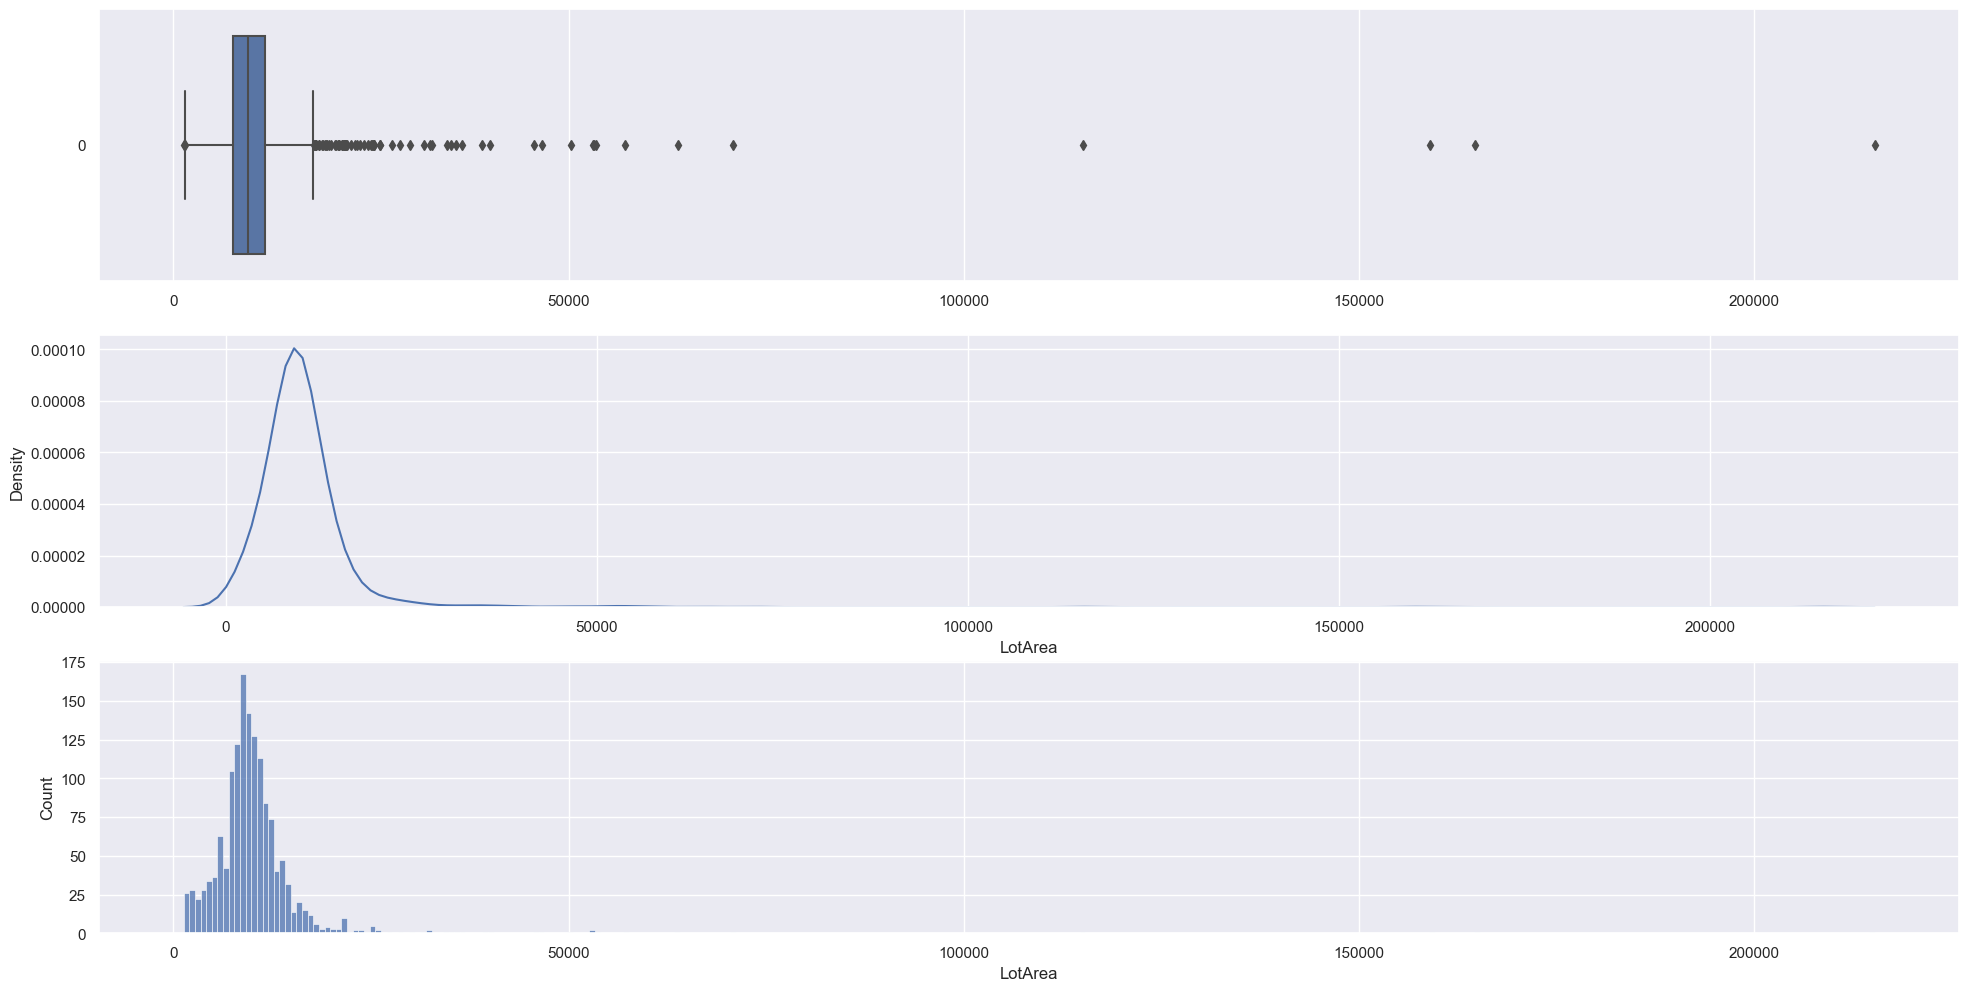

In [91]:
fig, axes = plt.subplots(3, figsize=(24,12))
sb.boxplot(data=cl['LotArea'],orient='h',ax = axes[0])
sb.kdeplot(data=cl['LotArea'],ax = axes[1])
sb.histplot(data = cl['LotArea'], ax = axes[2])

2e) Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot and find the Correlation between the two.

In [93]:
#create a joint dataframe by concatenating the two varaibles
j = pd.concat([cl['SalePrice'],cl['LotArea']],axis=1).reindex(cl['SalePrice'].index)
j

,SalePrice,LotArea
0,208500,8450
1,181500,9600
2,223500,11250
3,140000,9550
4,250000,14260
...,...,...
1455,175000,7917
1456,210000,13175
1457,266500,9042
1458,142125,9717


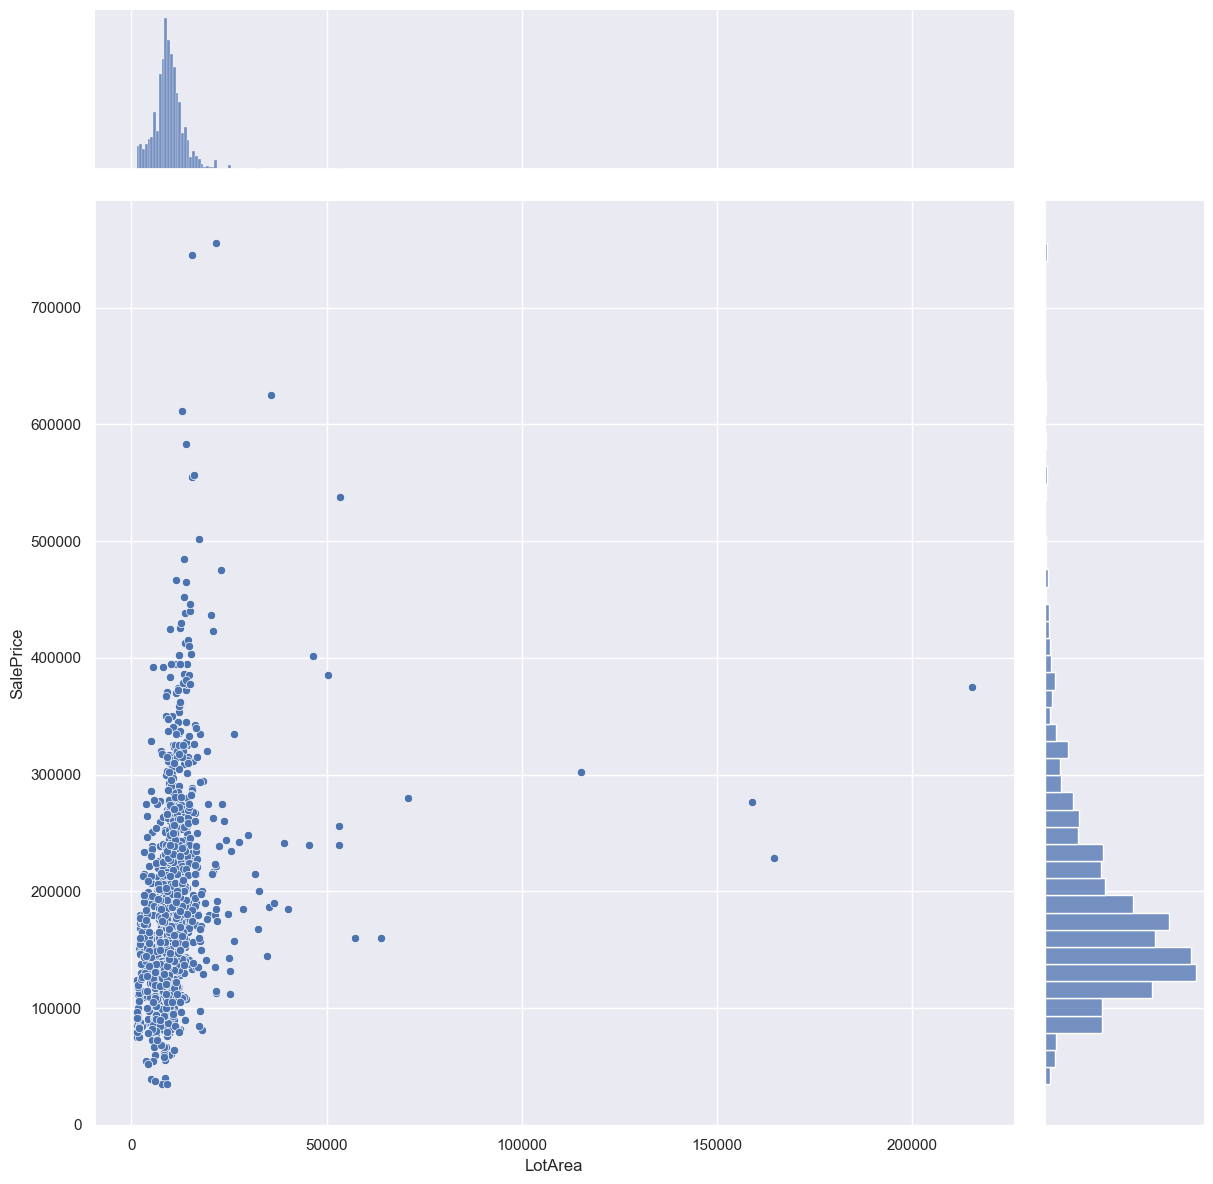

In [99]:
sb.jointplot(data = j, x='LotArea',y='SalePrice',height = 12)

In [95]:
j.corr()

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


## Bonus Problem
Create a new Pandas DataFrame consisting of all variables (columns) of type Integer (int64) or Float (float64).
Read the description for each variable carefully and try to identify the “actual” Numeric variables in the data.
Drop non-Numeric variables from the DataFrame to have a clean DataFrame with only the Numeric variables.
Plot SalePrice vs each of the Numeric variables you identified to understand their correlation or dependence.

In [101]:
bp = pd.DataFrame(tr[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                      'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']])
bp.head(n=20)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,3,836,192,84,0,0,0,0,0,250000
5,85.0,14115,0.0,732,0,64,796,796,566,0,...,2,480,40,30,0,320,0,0,700,143000
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,...,2,636,255,57,0,0,0,0,0,307000
7,NaN,10382,240.0,859,32,216,1107,1107,983,0,...,2,484,235,204,228,0,0,0,350,200000
8,51.0,6120,0.0,0,0,952,952,1022,752,0,...,2,468,90,0,205,0,0,0,0,129900
9,50.0,7420,0.0,851,0,140,991,1077,0,0,...,1,205,0,4,0,0,0,0,0,118000


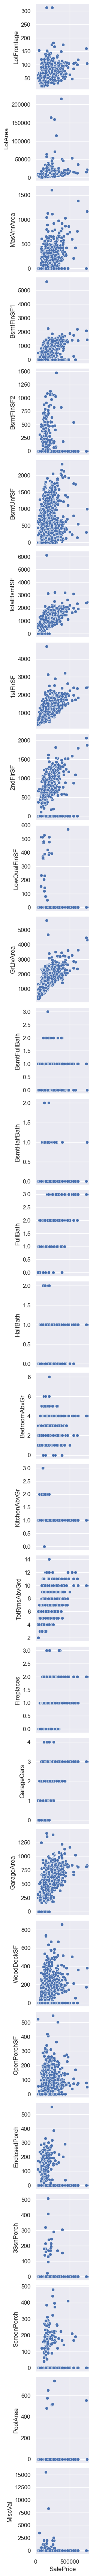

In [103]:
pp = sb.pairplot(data = bp, x_vars = ['SalePrice'], y_vars=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                      'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'])

In [104]:
bp.corr()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,-0.094480,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


<AxesSubplot:>

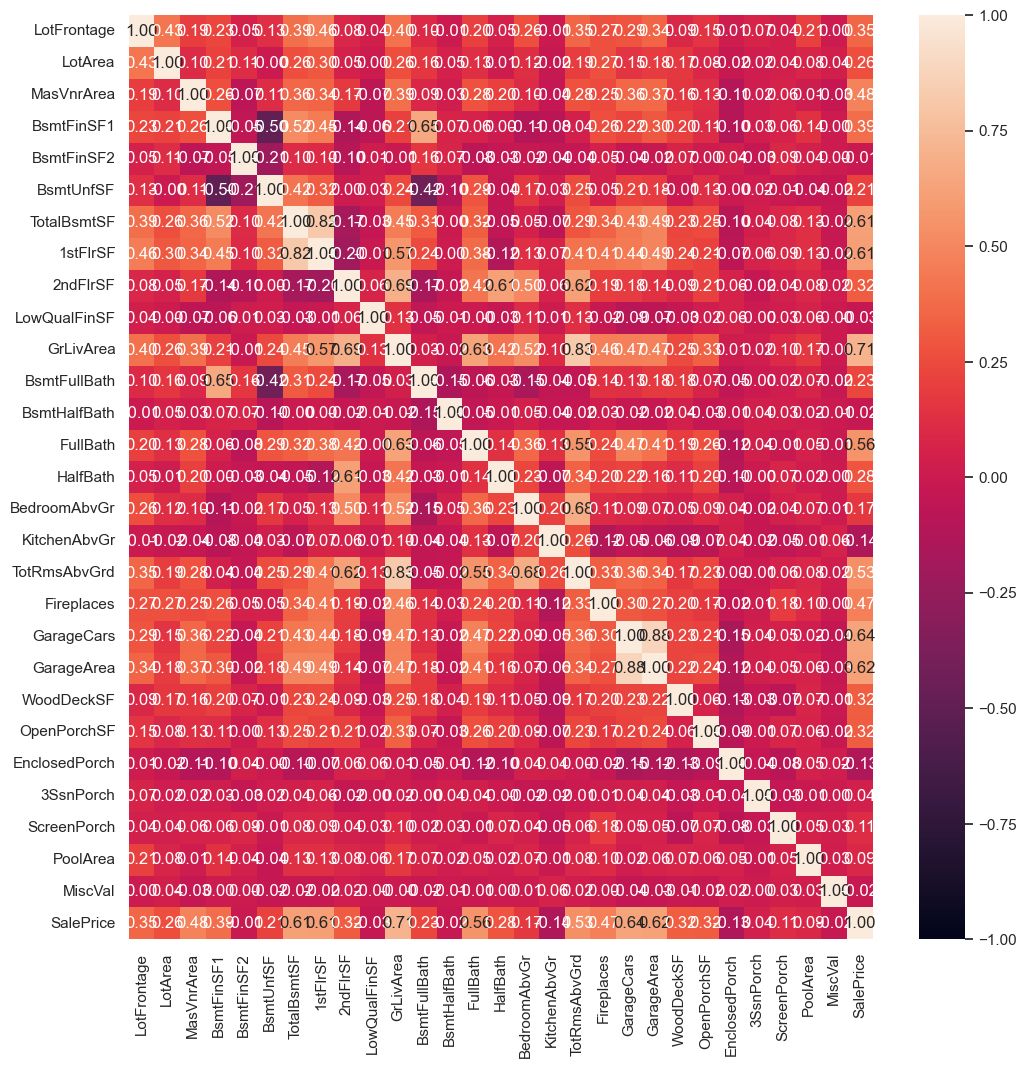

In [106]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(bp.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")